# Loading data

In [660]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

folder_path = '/Users/10n9/Desktop/BA_NYP_2024/ITD214/Sephora'  

reviews_dfs = []

for file_name in os.listdir(folder_path):
    if file_name.startswith('reviews_') and file_name.endswith('.csv'):

        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        reviews_dfs.append(df)
    elif file_name == 'product_info.csv':
      
        product_info_path = os.path.join(folder_path, file_name)
        product_df = pd.read_csv(product_info_path)

reviews_df = pd.concat(reviews_dfs, ignore_index=True)

/var/folders/10/2tkqjth17t90mlcz944ltkmw0000gn/T/ipykernel_1492/4164102939.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/10/2tkqjth17t90mlcz944ltkmw0000gn/T/ipykernel_1492/4164102939.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/10/2tkqjth17t90mlcz944ltkmw0000gn/T/ipykernel_1492/4164102939.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# data exploring

In [662]:
# Get some base information on our dataset
print ("Rows     : " , reviews_df.shape[0])
print ("Columns  : " , reviews_df.shape[1])
print ("\nFeatures : \n" ,reviews_df.columns.tolist())
print ("\nMissing values :  ", reviews_df.isnull().sum().values.sum())
print ("\nUnique values :  \n", reviews_df.nunique())

Rows     :  1094411
Columns  :  19

Features : 
 ['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name', 'price_usd']

Missing values :   1760170

Unique values :  
 Unnamed: 0                  602130
author_id                   578653
rating                           5
is_recommended                   2
helpfulness                   3767
total_feedback_count           676
total_neg_feedback_count       259
total_pos_feedback_count       590
submission_time               5317
review_text                 969419
review_title                364105
skin_tone                       14
eye_color                        6
skin_type                        4
hair_color                       7
product_id                    2351
product_name                  23

In [663]:
reviews_df.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [664]:
# Get some base information on our dataset
print ("Rows     : " , product_info_df.shape[0])
print ("Columns  : " , product_info_df.shape[1])
print ("\nFeatures : \n" ,product_info_df.columns.tolist())
print ("\nMissing values :  ", product_info_df.isnull().sum().values.sum())
print ("\nUnique values :  \n", product_info_df.nunique())

Rows     :  8494
Columns  :  27

Features : 
 ['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'product_rating', 'product_reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'product_price_usd', 'product_value_price_usd', 'product_sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price']

Missing values :   44370

Unique values :  
 product_id                 8494
product_name               8415
brand_id                    304
brand_name                  304
loves_count                7436
product_rating             4394
product_reviews            1556
size                       2055
variation_type                7
variation_value            2729
variation_desc              935
ingredients                6538
product_price_usd           298
product_value_price_usd

In [665]:
product_info_df.isnull().sum()

product_id                    0
product_name                  0
brand_id                      0
brand_name                    0
loves_count                   0
product_rating              278
product_reviews             278
size                       1631
variation_type             1444
variation_value            1598
variation_desc             7244
ingredients                 945
product_price_usd             0
product_value_price_usd    8043
product_sale_price_usd     8224
limited_edition               0
new                           0
online_only                   0
out_of_stock                  0
sephora_exclusive             0
highlights                 2207
primary_category              0
secondary_category            8
tertiary_category           990
child_count                   0
child_max_price            5740
child_min_price            5740
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


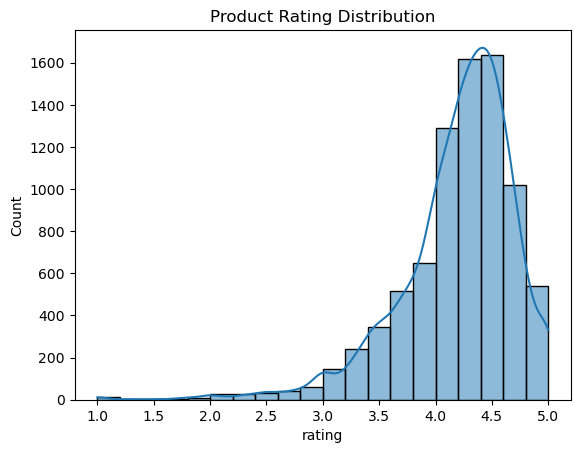

In [666]:
# viz: rating distribution
sns.histplot(product_df["rating"], bins=20, kde=True)
plt.title("Product Rating Distribution")
plt.show()

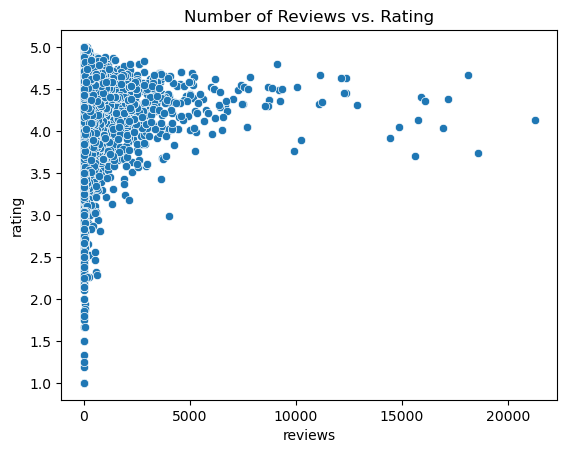

In [667]:
# viz：no. of reviews vs. rating
sns.scatterplot(x=product_df["reviews"], y=product_df["rating"])
plt.title("Number of Reviews vs. Rating")
plt.show()

# Data Transformation

In [669]:
# reviews aggregation on product_id
agg_reviews = reviews_df.groupby('product_id').agg({
    'rating': 'mean',
    'is_recommended': 'mean',
    'helpfulness': 'mean'
}).reset_index()

# rename column name
agg_reviews.rename(columns={
    'rating': 'reviews_avg_rating',
    'is_recommended': 'reviews_avg_is_recommended',
    'helpfulness': 'reviews_avg_helpfulness'
}, inplace=True)


rename_cols = {
    'rating': 'product_rating',
    'reviews': 'product_reviews',
    'price_usd': 'product_price_usd',
    'value_price_usd': 'product_value_price_usd',
    'sale_price_usd': 'product_sale_price_usd'
}
product_info_df.rename(columns=rename_cols, inplace=True)

# merge reviews 和 product_info
merged_df = agg_reviews.merge(product_info_df, on='product_id', how='left')

In [670]:
# Get some base information on our dataset
print ("Rows     : " , merged_df.shape[0])
print ("Columns  : " , merged_df.shape[1])
print ("\nFeatures : \n" ,merged_df.columns.tolist())
print ("\nMissing values :  ", merged_df.isnull().sum().values.sum())
print ("\nUnique values :  \n", merged_df.nunique())
print("\nMissing values detail : \n", merged_df.isnull().sum())

Rows     :  2351
Columns  :  30

Features : 
 ['product_id', 'reviews_avg_rating', 'reviews_avg_is_recommended', 'reviews_avg_helpfulness', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'product_rating', 'product_reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'product_price_usd', 'product_value_price_usd', 'product_sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price']

Missing values :   12722

Unique values :  
 product_id                    2351
reviews_avg_rating            1779
reviews_avg_is_recommended    1485
reviews_avg_helpfulness       2204
product_name                  2334
brand_id                       142
brand_name                     142
loves_count                   2261
product_rating                1672
product_reviews                877
size      

In [671]:
#missing value percentage
missing_values = merged_df.isnull().sum().sort_values(ascending=False)
missing_percent = (merged_df.isnull().sum() / len(merged_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

print(missing_data[missing_data['Missing Values'] > 0])

                         Missing Values  Percentage
child_max_price                    1952   83.028499
child_min_price                    1952   83.028499
highlights                          414   17.609528
ingredients                         127    5.401957
product_sale_price_usd             2306   98.085921
product_value_price_usd            2212   94.087622
reviews_avg_helpfulness              10    0.425351
size                                333   14.164185
tertiary_category                   352   14.972352
variation_desc                     2338   99.447044
variation_type                      339   14.419396
variation_value                     387   16.461080


In [682]:
merged_df.drop(columns=['child_max_price', 'child_min_price', 'highlights','ingredients', 'product_sale_price_usd','product_value_price_usd','size','variation_desc','variation_type','variation_value'], inplace=True)

In [684]:
df = merged_df.dropna()

In [686]:
# drop non-related columns
df.drop(columns=['product_id', 'product_name', 'brand_name', 'primary_category'], inplace=True)

/var/folders/10/2tkqjth17t90mlcz944ltkmw0000gn/T/ipykernel_1492/109700670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['product_id', 'product_name', 'brand_name', 'primary_category'], inplace=True)


In [688]:
# Get some base information on our dataset
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())
print("\nMissing values detail : \n", df.isnull().sum())

Rows     :  1994
Columns  :  16

Features : 
 ['reviews_avg_rating', 'reviews_avg_is_recommended', 'reviews_avg_helpfulness', 'brand_id', 'loves_count', 'product_rating', 'product_reviews', 'product_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'secondary_category', 'tertiary_category', 'child_count']

Missing values :   0

Unique values :  
 reviews_avg_rating            1626
reviews_avg_is_recommended    1375
reviews_avg_helpfulness       1928
brand_id                       137
loves_count                   1927
product_rating                1531
product_reviews                837
product_price_usd              210
limited_edition                  2
new                              2
online_only                      2
out_of_stock                     2
sephora_exclusive                2
secondary_category              10
tertiary_category               30
child_count                     11
dtype: int64

Missing values detail : 
 reviews_avg

# Value Normalization

In [691]:
# Identify numerical and categorical features
num_features = ['reviews_avg_rating', 'reviews_avg_is_recommended', 'reviews_avg_helpfulness', 'loves_count', 'product_rating', 'product_reviews', 'child_count']
cat_features = ['brand_id', 'secondary_category', 'tertiary_category']

# Define preprocessing pipeline
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

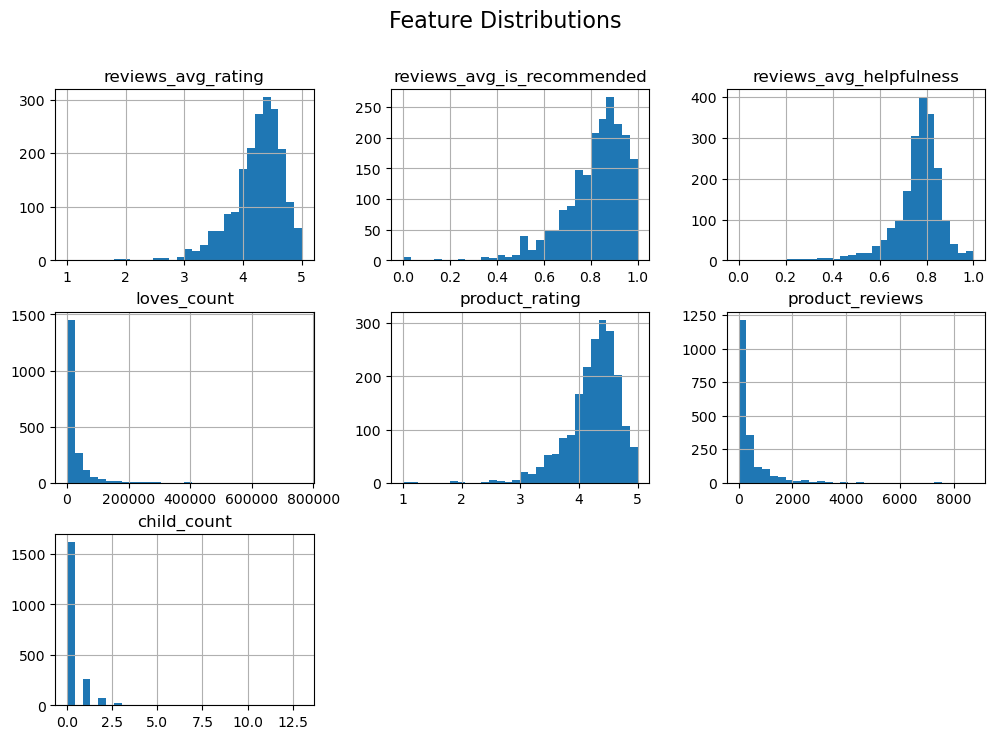

In [713]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = ['reviews_avg_rating', 'reviews_avg_is_recommended', 'reviews_avg_helpfulness', 
                'loves_count', 'product_rating', 'product_reviews', 'child_count']

df[num_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


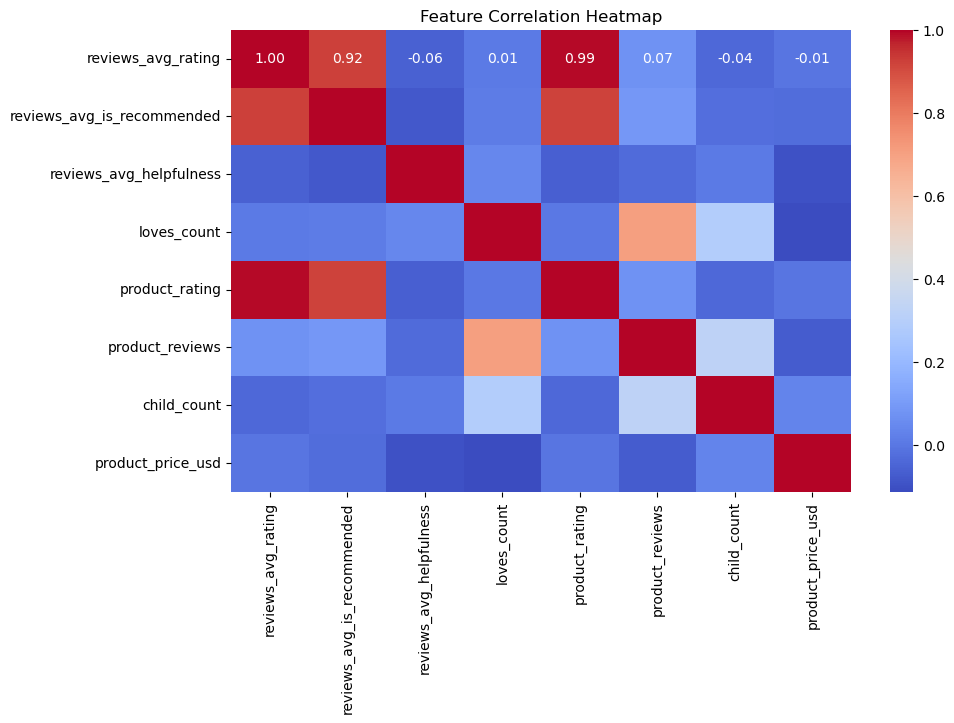

In [715]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# Modeling and evaluating

In [693]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target variable
target = 'product_price_usd'

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[num_features + cat_features], df[target], test_size=0.2, random_state=42)

In [695]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

In [697]:
# Train and evaluate models
best_model = None
best_score = float('-inf')

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=5)
    mean_score = np.mean(scores)
    
    print(f"{name}: Mean R2 Score = {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model']} with R2 Score: {best_score:.4f}")

Linear Regression: Mean R2 Score = 0.3426
Ridge Regression: Mean R2 Score = 0.4172
Random Forest: Mean R2 Score = 0.4276
Gradient Boosting: Mean R2 Score = 0.3059
SVR: Mean R2 Score = -0.0068
Best Model: RandomForestRegressor(random_state=42) with R2 Score: 0.4276


In [698]:
# Hyperparameter tuning for the best model (Random Forest example)
if isinstance(best_model.named_steps['model'], RandomForestRegressor):
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print("Optimized Model Parameters:", grid_search.best_params_)

Optimized Model Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 300}


In [699]:
# Evaluate on test set
y_pred = best_model.predict(X_test)
print(f"Test R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Test R2 Score: 0.6018
Test MAE: 19.1420
Test RMSE: 33.2163


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


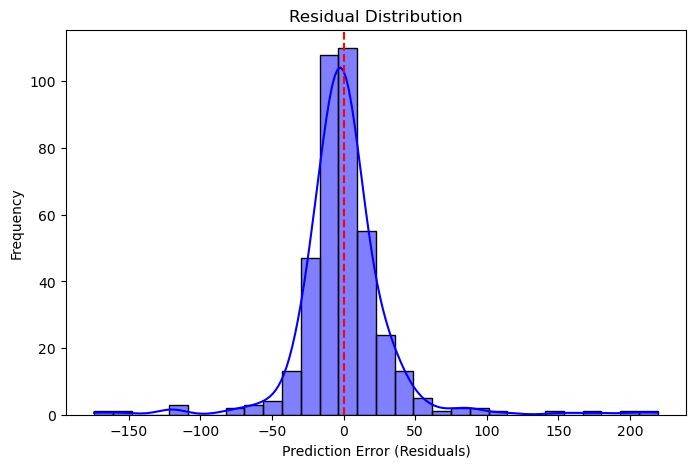

In [733]:
residuals = y_test - y_pred  # 计算残差（预测误差）

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='blue')

plt.axvline(x=0, color='red', linestyle='--')  # 误差均值参考线
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")

plt.show()


In [700]:
# Price Elasticity Calculation
def price_elasticity(y_actual, y_pred, price_change=0.1):
    elasticity = ((y_pred - y_actual) / y_actual) / price_change
    return elasticity

In [701]:
# Calculate elasticity for each product
df['predicted_price'] = best_model.predict(df[num_features + cat_features])
df['elasticity'] = price_elasticity(df[target], df['predicted_price'])


/var/folders/10/2tkqjth17t90mlcz944ltkmw0000gn/T/ipykernel_1492/3972720458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_price'] = best_model.predict(df[num_features + cat_features])
/var/folders/10/2tkqjth17t90mlcz944ltkmw0000gn/T/ipykernel_1492/3972720458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elasticity'] = price_elasticity(df[target], df['predicted_price'])


In [702]:
# Price Adjustment Strategy
def adjust_price(elasticity, current_price):
    if elasticity < -1:
        return current_price * 0.9  # Lower price if demand is elastic
    elif -1 <= elasticity < 0:
        return current_price * 1.1  # Increase price if demand is inelastic
    else:
        return current_price  # Keep price the same

df['adjusted_price'] = df.apply(lambda row: adjust_price(row['elasticity'], row[target]), axis=1)


/var/folders/10/2tkqjth17t90mlcz944ltkmw0000gn/T/ipykernel_1492/1053777434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjusted_price'] = df.apply(lambda row: adjust_price(row['elasticity'], row[target]), axis=1)


In [703]:
# Print adjustments
print(df[['brand_id', target, 'adjusted_price']])

      brand_id  product_price_usd  adjusted_price
0         4164               89.0            80.1
1         3728               48.0            52.8
2         4171               12.0            12.0
3         1254               20.0            20.0
4         1254               26.0            26.0
...        ...                ...             ...
2346      4171               82.0            90.2
2347      2082               39.0            42.9
2348      4164               42.0            46.2
2349      4164               68.0            74.8
2350      4164               44.0            48.4

[1994 rows x 3 columns]


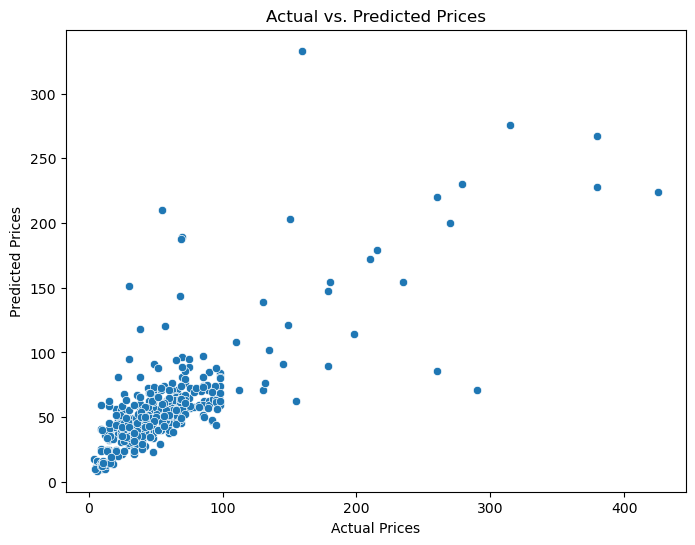

In [717]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()
